# State of the Union Addresses Analysis

In this notebook we analyzing first the lengths and then the similarities of the State of the Union Addresses.

In [1]:
#Import stuff
import numpy as np 
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=9):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    # if you have LaTeX installed on your laptop, uncomment the line below for prettier labels
    #plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

In [2]:
# Import speeches
with open('speeches.json', 'r') as f:
    speeches = json.loads(f.read())
    
# Create dataframe
df = pd.DataFrame.from_dict(speeches, orient='columns')
df.describe()

,president,text,year
count,226,226,226
unique,41,226,223
top,Franklin D. Roosevelt,"Mr. President, Mr. Speaker, Members of the Uni...",1961
freq,12,1,2


## Part I: Analysis of SOU lengths

In [3]:
#Last_speech = df.at[225, "text"]
#print(Last_speech)
df.head(3)

,president,text,year
0,George Washington,Fellow-Citizens of the Senate and House of Re...,1790
1,George Washington,Fellow-Citizens of the Senate and House of Re...,1791
2,George Washington,Fellow-Citizens of the Senate and House of Rep...,1792


#### (a) Parsing of the SOU addresses

In [4]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [5]:
# Function that uses the above routines
# and parces a text; returns number of sentences and 
# mean sentence length
def parsing(text):
    # Get the sentences 
    sentences = sent_tokenize(text)
    number_sent = len(sentences) # The number of sentences in the text
    words = word_tokenize(text)
    number_words = len(words) # Number of words in the text 
    average_length = float(number_words)/float(number_sent) # Calculate average length
    return number_sent, average_length    

#### (b) Lengths and Regressions

Here I calculate, for each year, the number of sentences in the address and the mean sentence length in words for that year.

In [6]:
# Now, using the above, calculate number of sentences and 
# mean sentence length/year, for the 226 SOU adresses above

# Initialize the arrays
num_sent = np.zeros(226) #Number of sentences
av_length = np.zeros(226) #Average sentence length

# Populatate 
for i in range(226):
    SOU_add = df.at[i, "text"] # SOU address
    num_sent[i], av_length[i] = parsing(SOU_add)    

In [7]:
# Let's print the minimum and maximum number of sentences, to see if they look reasonable
print(min(num_sent))
print(max(num_sent))

36.0
1349.0


In [8]:
years = pd.to_numeric(df["year"].values) #The years 
print(min(years),max(years))

(1790, 2013)


I will calculate the regressions now, using $\hat{\beta} = (X^T X)^{-1}X^T y$

In [9]:
# Define the matrix X
X = np.zeros([226,2])
X[:,0] = years
X[:,1] = 1

beta, c =np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(),X)),X.transpose()),num_sent)

print(beta, c)

x_lin = np.linspace(min(years)-20, max(years)+20, 1000)
y_fit = beta*x_lin + c

(0.7855113265090372, -1214.1050807238103)


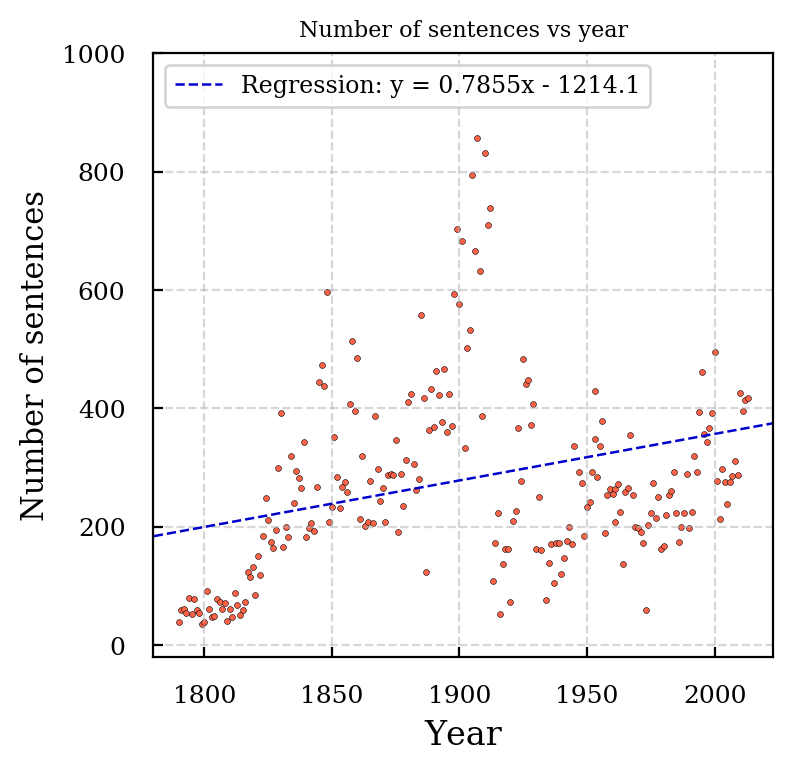

In [10]:
fig = plt.subplots(figsize = (4.0,4.0))

plt.scatter(years, num_sent, s=4.5,marker='o',edgecolors='k',linewidth=0.2, c='tomato')
plt.plot(x_lin, y_fit, c='mediumblue', ls='--',
         linewidth=0.9,label='Regression: y = 0.7855x - 1214.1')

plt.grid(ls='--',alpha=0.5)
plt.legend(frameon=True, loc='upper left', fontsize=8.5)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of sentences", fontsize=11)
plt.title('Number of sentences vs year', fontsize=8)

plt.xlim(min(years)-10,max(years)+10)
plt.ylim(-20,1000)
plt.show()

In [11]:
beta2, c2 =np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(),X)),X.transpose()),av_length)

print(beta2, c2)
y_fit2 = beta2*x_lin + c2

(-0.12306160457807824, 266.8401821975583)


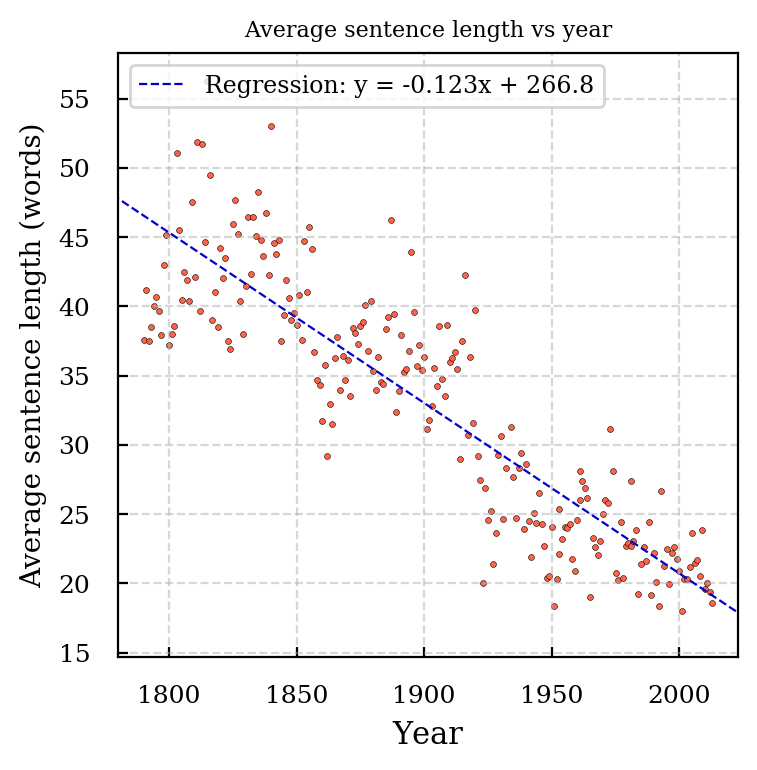

In [12]:
fig = plt.subplots(figsize = (4.0,4.0))

plt.scatter(years, av_length ,  s=4.5,marker='o',edgecolors='k',linewidth=0.2, c='tomato')
plt.plot(x_lin, y_fit2, c='mediumblue', ls='--',
         linewidth=0.8,label='Regression: y = -0.123x + 266.8')



plt.grid(ls='--',alpha=0.5)
plt.legend(frameon=True, loc='upper left', fontsize=8.5)

plt.xlabel("Year", fontsize=11)
plt.ylabel("Average sentence length (words)", fontsize=10)
plt.title('Average sentence length vs year', fontsize=8)
plt.xlim(min(years)-10,max(years)+10)
plt.show()

#### (c) Regressions of total number of words

Here I compute two regressions of the total number of words in a SOU versus years:

- One for the years 1790-1912
- Another for years 1913-present

In [13]:
def word_parsing(text):
    words = word_tokenize(text) # All the words
    num_words = len(words) #Number of words
    return num_words

In [14]:
num_words = np.zeros(226)

for i in range(226):
    SOU_loc = df.at[i, "text"] # SOU address
    num_words[i] = word_parsing(SOU_loc)
    
    
# Now split the number of words array to two arrays:
# One before 1913, one after 1913
num_words_before = num_words[years<=1912] 
num_words_after = num_words[years>=1913]

# And the same for years
years_before = years[years<=1912]
years_after = years[years>=1913]

Calculate regressions as before...

In [15]:
X_before = np.zeros([len(years_before),2])
X_before[:,0] = years_before
X_before[:,1] = 1

X_after = np.zeros([len(years_after),2])
X_after[:,0] = years_after
X_after[:,1] = 1

beta_before, c_before =np.dot(np.dot(np.linalg.inv(np.dot(X_before.transpose(),X_before)),X_before.transpose()),num_words_before)
beta_after, c_after =np.dot(np.dot(np.linalg.inv(np.dot(X_after.transpose(),X_after)),X_after.transpose()),num_words_after)
# ==============================================================
# ==============================================================
print(beta_before, c_before)
print(beta_after, c_after)

(152.065676954974, -270689.0395883761)
(8.65606852005006, -10462.82967443823)


In [16]:
x_lin_bef = np.linspace(min(years_before)-20, max(years_before)+20, 1000)
y_fit_bef = beta_before*x_lin_bef + c_before

x_lin_aft = np.linspace(min(years_after)-20, max(years_after)+20, 1000)
y_fit_aft = beta_after*x_lin_aft + c_after

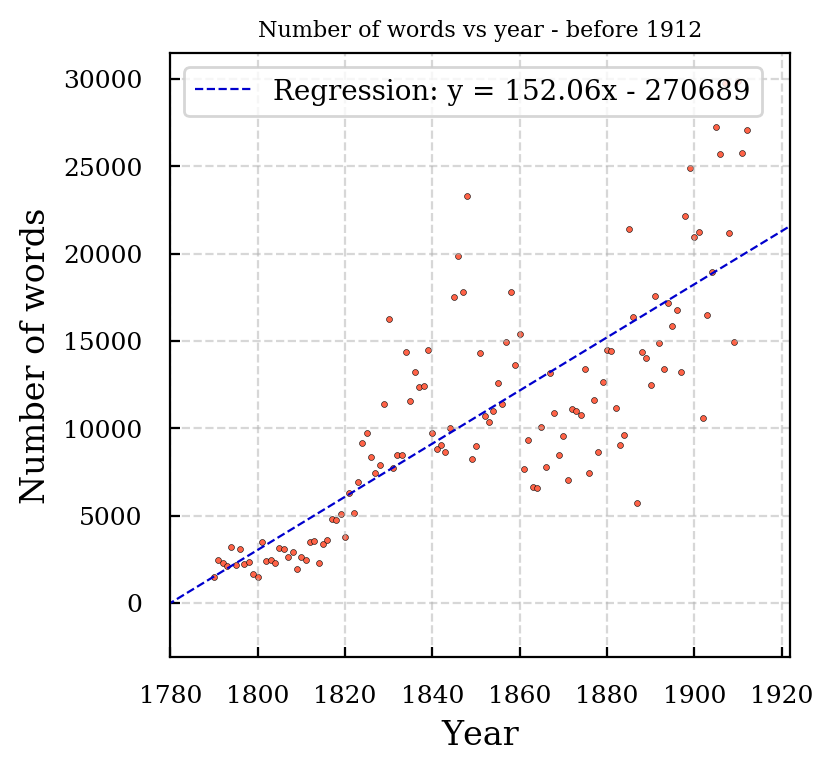

In [17]:
fig = plt.subplots(figsize = (4.0,4.0))

plt.scatter(years_before, num_words_before,
            s=4.5,marker='o',edgecolors='k',linewidth=0.2, c='tomato')
plt.plot(x_lin_bef, y_fit_bef, c='mediumblue', ls='--',
         linewidth=0.8,label='Regression: y = 152.06x - 270689')

plt.grid(ls='--',alpha=0.5)
plt.legend(frameon=True, loc='upper left', fontsize=10)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of words", fontsize=12)
plt.title('Number of words vs year - before 1912', fontsize=8)

plt.xlim(min(years_before)-10,max(years_before)+10)
plt.show()

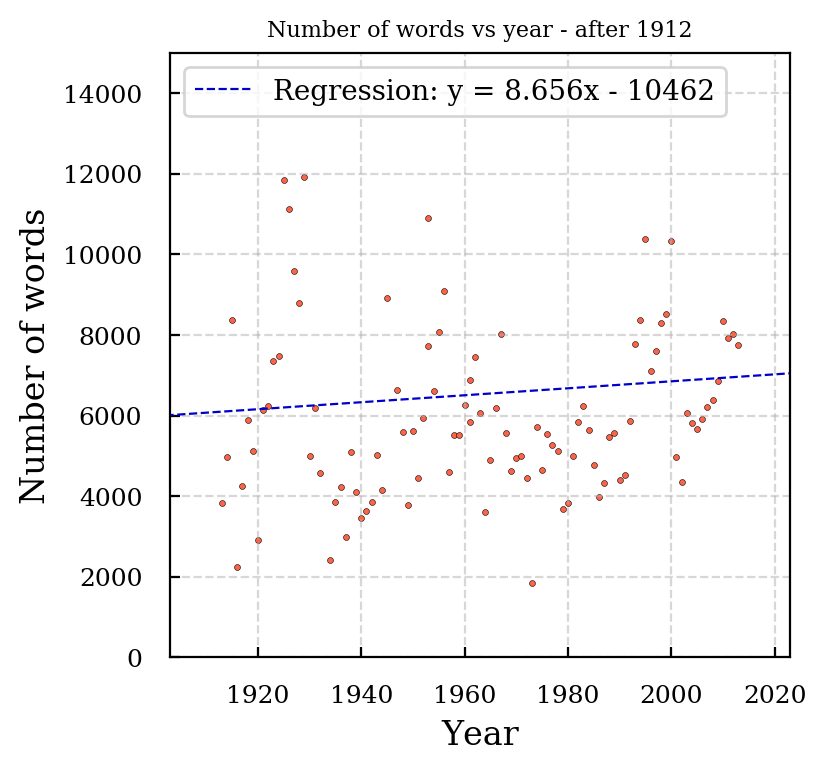

In [18]:
fig = plt.subplots(figsize = (4.0,4.0))

plt.scatter(years_after, num_words_after, 
            s=4.5,marker='o',edgecolors='k',linewidth=0.2, c='tomato')
plt.plot(x_lin_aft, y_fit_aft, c='mediumblue', ls='--',
         linewidth=0.8,label='Regression: y = 8.656x - 10462')

plt.grid(ls='--',alpha=0.5)
plt.legend(frameon=True, loc='upper left', fontsize=10)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of words", fontsize=12)
plt.title('Number of words vs year - after 1912', fontsize=8)

plt.xlim(min(years_after)-10,max(years_after)+10)
plt.ylim(0,15000)
plt.show()

#### (d) 

In [19]:
min_aver = min(av_length)
max_aver = max(av_length)

pos_min = np.where(av_length==min_aver)
pos_max = np.where(av_length==max_aver)

In [20]:
print("President with minimum average sentancses:")
print(df.at[int(pos_min[0]), "president"])

President with minimum average sentancses:
George W. Bush


In [21]:
print("President with maximum average sentancses:")
print(df.at[int(pos_max[0]), "president"])

President with maximum average sentancses:
James Madison


## Part II : Analysis of SOU similarities

In this part we will use the ***vector space model*** to find similar SOU addresses. 

In the vector space model, a document of words $d$ is represented by a ``TF-IDF`` vector $\mathbf{w}(d) = (w_1(d), w_2(d), \dots, w_V(d))$ of length V, where V is the total number of words in the vocabulary. The `` TF-IDF`` weights are given by:

\begin{equation}
w_i(d) = n_i(d) \log \left( \frac{|\cal{D}|}{\sum_{d' \in D} \mathbf{1}(t_i \in d')}\right)
\end{equation}

where $n_i(d)$ is the number of times term $t_i$ appears in document $d$, $\sum_{d' \in D} \mathbf{1}$ is the number of documents that contain term $t_i$, and $|\cal{D}|$ is the total number of documents in the collection $\cal{D}$. This weighting scheme favors terms that apppear in a few documents.

Here, I'll start by using the sklearn implementation and then I'll write my own code for `TD-IDF`.

#### a) Preprocessing and creation of `TF-IDF` vectors

In [22]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#nltk.download('stopwords')
#nltk.download('wordnet')
# Load English stopwords
stopWords = stopwords.words('english')

In [23]:
# Define a function that takes text and performs all the preprocessing

def preprocessing(text):
   # First tokenize in words
    text = word_tokenize(text)
    # Next convert to lower case
    text = np.char.lower(text)
    # ==============================================
    # ==============================================
    # Remove symbols now
    symbols = "!\"#$%&()*+-./:;,<=>?@[\]^_`{|}~\n1234567890"
    for i in symbols:
        text = np.char.replace(text, i, ' ')
    # ==============================================
    #===============================================
    # Now remove the stopwords
    text = [w for w in text if w not in stopWords]
    # ==============================================
    # ==============================================
    # Remove apostrophes, if any
    text = np.char.replace(text, "''", " ")
    # ==============================================
    # ==============================================
    # Remove empty entries
    empty = " "
    text = [i for i in text if i not in empty ] 
    # ==============================================
    # ==============================================
    # Now lemmatize the  text
    lemmatizer = WordNetLemmatizer()
    
    text = [lemmatizer.lemmatize(w) for w in text]
    
    final_text = ' '.join(text)
    return final_text

Now, it is time to create the `TF-IDF` vectors.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(strip_accents=None,
                       lowercase=False,
                       preprocessor=None)

In [25]:
corpus = []

for i in range(226):
    sou_add_loc = df.at[i, "text"]
    pre_processed = preprocessing(sou_add_loc)
    corpus.append(pre_processed)

In [26]:
tfdif_vectors = tfidf.fit_transform(corpus)
feature_names = tfidf.get_feature_names()
dense_vectors = tfdif_vectors.todense()
denselist = np.asarray(dense_vectors.tolist())
print(np.shape(denselist))

(226, 20638)


#### b) Similarity measures

A similarity measure between document is:

\begin{equation}
\mbox{sim}(d,d') = \frac{\mathbf{w}(d)\cdot \mathbf{w}(d')}{|| \mathbf{w}(d)||\, || \mathbf{w}(d')||},
\end{equation}

the cosine of the angle between the corresponding `TF-IDF` vectors.

In terms of this measure, we will find:

- The 50 most similar pairs of SOUs given by different Presidents.
- The 50 most similar pairs of SOUs given by the same Presidents.
- The 25 most similar pairs of Presidents, averaging the cosine similarity over all pairs of their SOUs.


Let's create a list of presidents first:

In [27]:
presidents = []
for i in range(226):
    presidents.append(df.at[i, "president"])
    
print(presidents[0])

George Washington


- Good! Now let's work first in finding the 50 most similar pairs of SOUs given by different Presidents. 

For that reason, I'll calculate the similarity between all pairs of speeches by different presidents and sort them...

In [84]:
# Initialize array of cosine similarities
similarities_diff = [] # For different presidents
# This array contains the pair of speeches for which the similarities
# Are calcuated
sim_pair_diff = [] # For differnet presidents


for i in range(226):
    # President i
    president_i = presidents[i]
    for j in range(i+1,226): # Check only unique pairs
        # President j
        president_j = presidents[j]
        # ========================================
        # ========================================
        # Check only the cases when we are talking about different presidents
        if (president_i!=president_j):
            # If they are not the same president, calculate cosine similarity
            simil = np.dot(denselist[i],denselist[j])
            similarities_diff.append(simil)
            sim_pair_diff.append((i,j))
            #print(president_i)
            
            
as_ind = np.argsort(similarities_diff)

In [99]:
sort_diff = [sim_pair_diff[i] for i in as_ind]
print(sort_diff[-25:-1])

[(61, 89), (90, 96), (166, 193), (39, 47), (55, 60), (117, 122), (66, 68), (46, 47), (89, 99), (91, 95), (90, 99), (90, 91), (117, 120), (91, 96), (40, 48), (95, 101), (89, 96), (89, 91), (90, 95), (87, 95), (89, 95), (46, 49), (95, 99), (40, 47)]


Then we can simply find the names of presidents... 

- Calculate now the similarities between the SOUs given by the same presidents. 

In [29]:
# Initialize array of cosine similarities
similarities_same = [] # For the same president
# This array contains the pair of speeches for which the similarities
# Are calcuated
sim_pair_same = [] # For the same president


for i in range(226):
    # President i
    president_i = presidents[i]
    for j in range(i+1,226): # Check only unique pairs
        # President j
        president_j = presidents[j]
        # ========================================
        # ========================================
        # Check only the cases when we are talking about the same president
        if (president_i==president_j):
            # If the president is the same, calculate the cosine similarity
            simil = np.dot(denselist[i],denselist[j])
            similarities_same.append(simil)
            sim_pair_same.append((i,j))

In [100]:
as_ind_same = np.argsort(similarities_same)

In [101]:
sort_same = [sim_pair_same[i] for i in as_ind_same]
print(sort_same[-25:-1])

[(222, 224), (117, 118), (103, 104), (209, 210), (96, 98), (68, 69), (210, 212), (211, 212), (56, 57), (210, 211), (39, 40), (65, 66), (108, 109), (67, 68), (68, 70), (114, 115), (165, 166), (44, 45), (119, 122), (95, 96), (115, 117), (109, 110), (89, 90), (119, 120)]


- Now for similar ***pairs*** of Presidents.

For that part I will calculate the similarities between pairs of presidents by averaging the cosine similarity over all pairs of their SOUs.

We have 41 presidents in our sample; I will create a $41 \times 41$ matrix to store the similarities between the SOU similarities of the presidents.

In [69]:
# Get the unique names of Presidents
pres_unique = df.president.unique()
# Get the number of unique presidents 
num_pres_unique = len(pres_unique)
presidents = np.asarray(presidents)

Pres_sim_mat = np.zeros((41,41))

for i in range(num_pres_unique):
    pres_i = pres_unique[i]
    for j in range(num_pres_unique):
        pres_j = pres_unique[j]
        
        #Now select the SOUs of the two presidents
        sou_i = denselist[presidents==pres_i]
        sou_j = denselist[presidents==pres_j]
    
    
        sum_simil = 0.0 # Sum of the similarities
        sum_ind = 0 # Number of pairs
        for m in range(len(sou_i)):
            for n in range(m,len(sou_j)):
                sum_simil += np.dot(sou_i[m],sou_j[n])
                sum_ind += 1
        # =============================================
        # =============================================
        Pres_sim_mat[i,j] = sum_simil/sum_ind

Let's plot the cosine similarity of their SOU address.

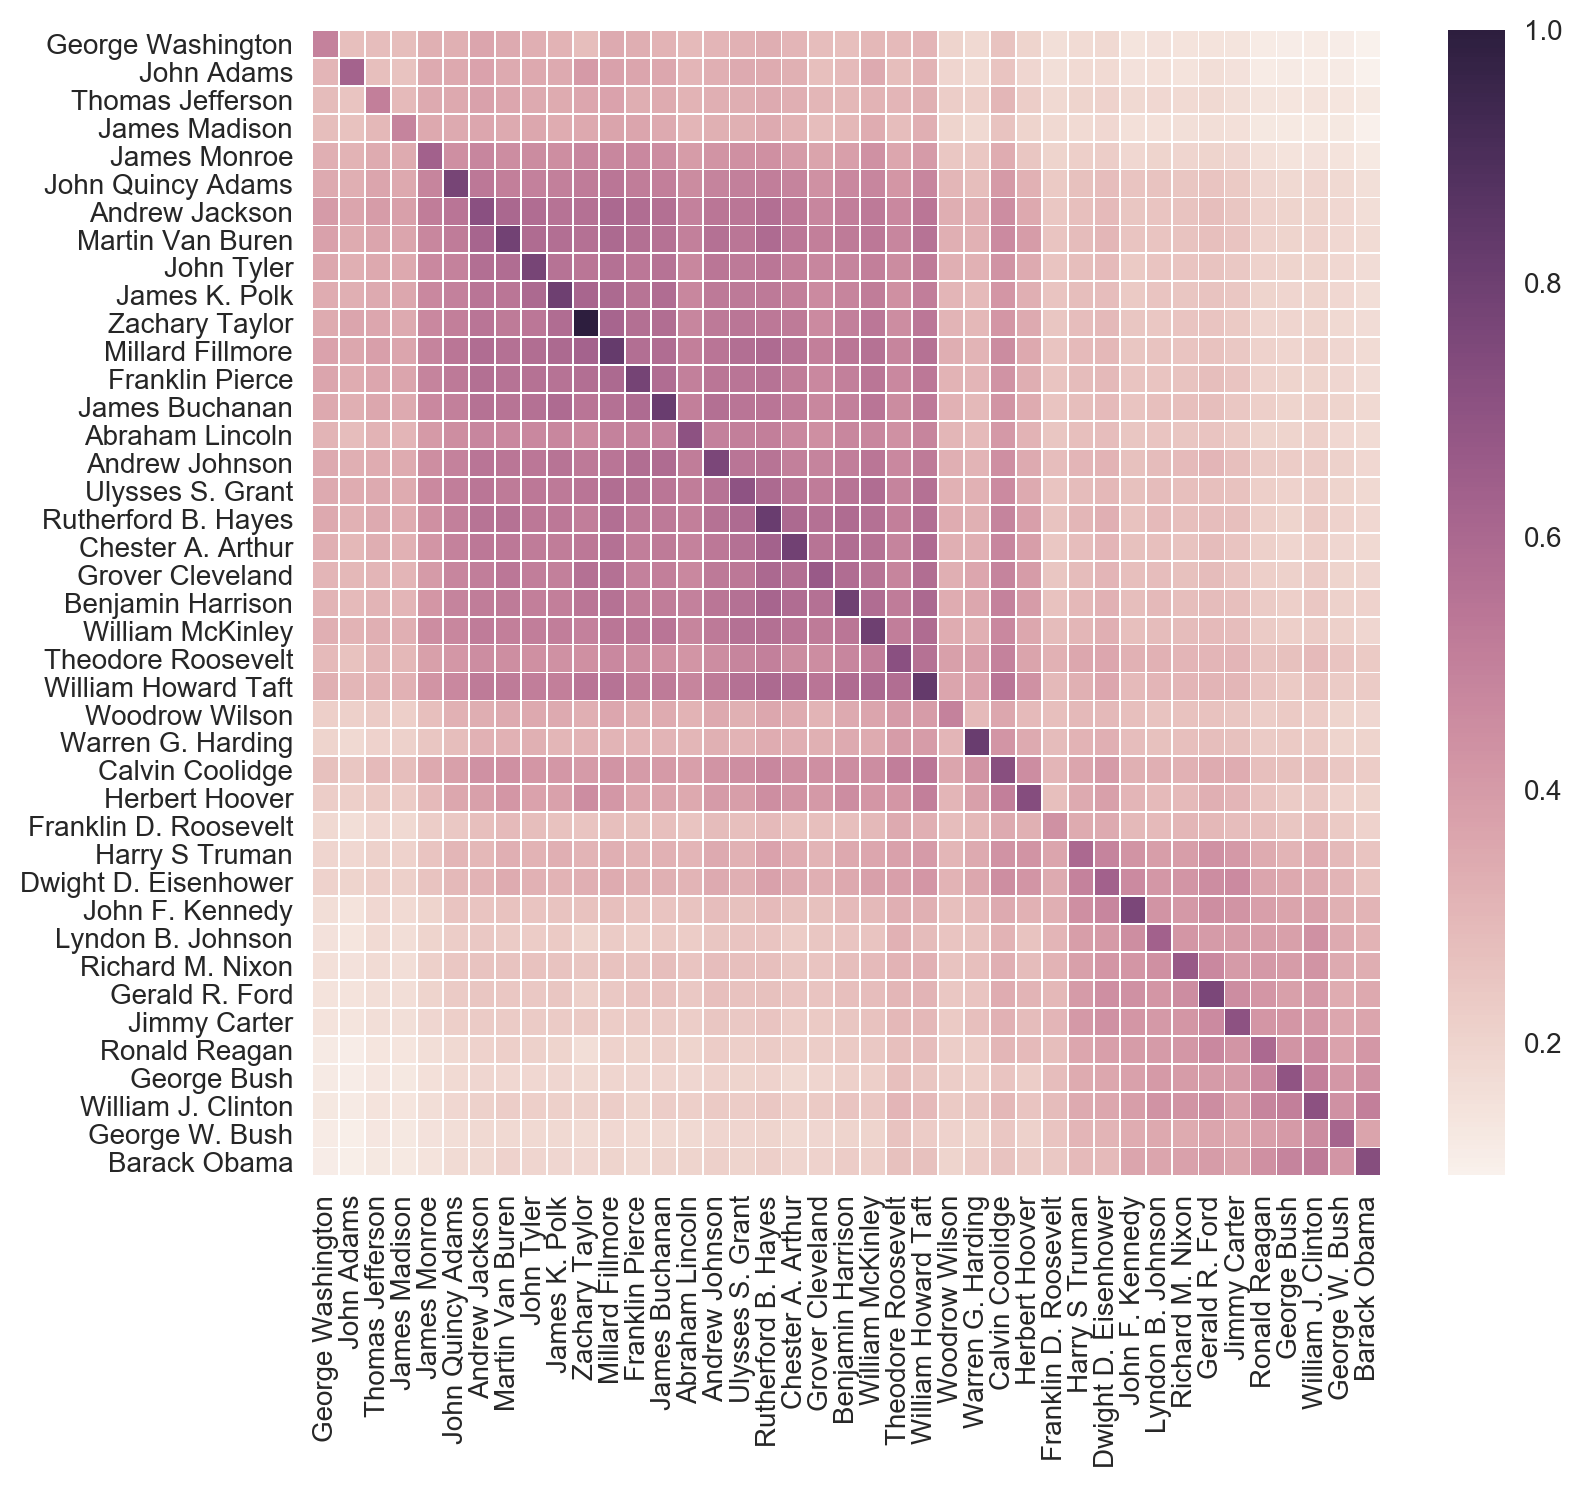

In [89]:
import seaborn as sns
sns.set()
# =================================================================
# =================================================================
f, ax = plt.subplots(figsize=(8.5, 7.6))
sns.heatmap(Pres_sim_mat, annot=False,xticklabels=pres_unique,
            yticklabels=pres_unique, linewidths=.3, ax=ax)
plt.tight_layout()
plt.savefig('SOU_President.png')
plt.show()

#### c) Clustering

In this part, I will use the TF-IDF vector representation to cluster the speeches using $k$-means.

First I will find the optimal number of clusters using the elbow method.

In [102]:
from sklearn.cluster import KMeans

In [119]:
n_clust = np.arange(1,61) # Array of number of clusters
distortions = np.zeros(len(n_clust))

for i in range(len(n_clust)):
    n_clust_loc = n_clust[i]
    km_model = KMeans(n_clusters=n_clust_loc,
                     init='k-means++',
                     n_init=10,
                     max_iter=50,
                     random_state=0)
    km_model.fit(denselist)
    distortions[i] = km_model.inertia_

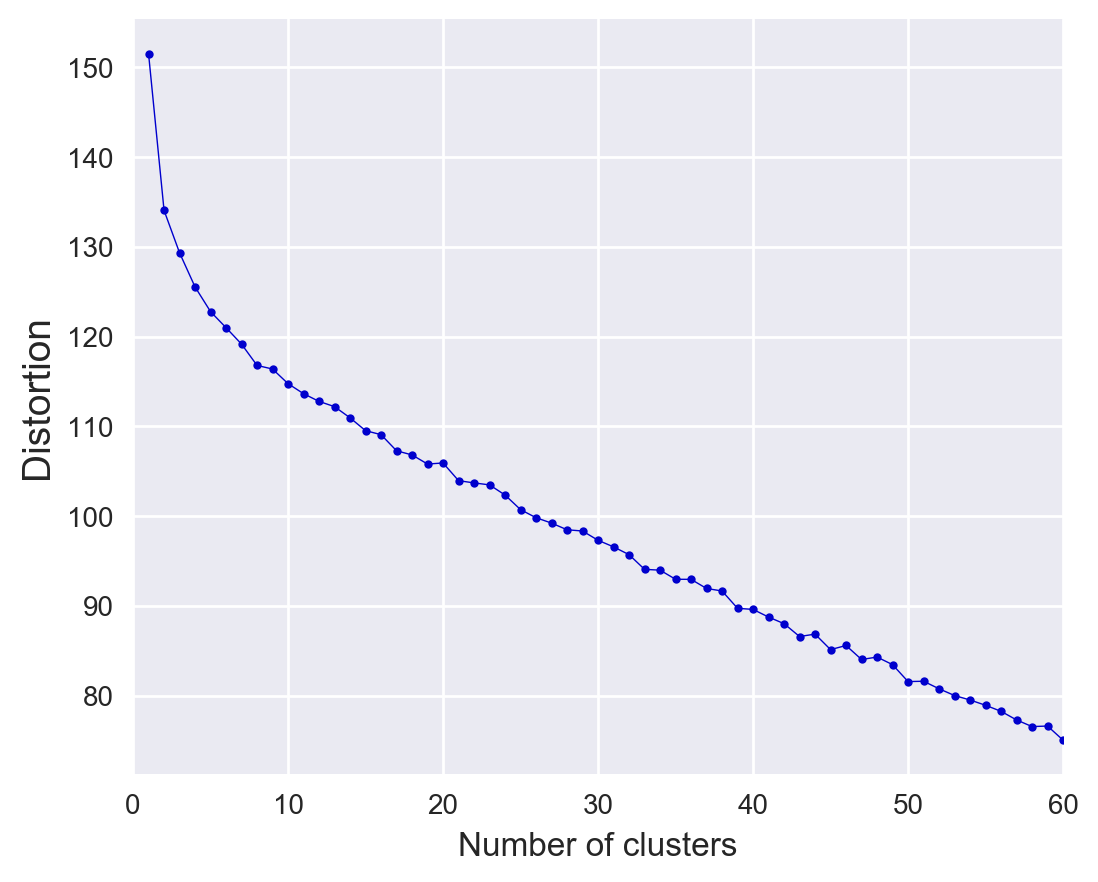

In [131]:
plt.figure(figsize=(6.0, 5.0))

plt.plot(n_clust,distortions, c='mediumblue',linewidth=0.5,marker='o',markersize=3)

plt.xlim(0,60)
plt.xlabel('Number of clusters',fontsize=12)
plt.ylabel('Distortion', fontsize=14)
plt.show()

In [132]:
km_model = KMeans(n_clusters=8,
                     init='k-means++',
                     n_init=10,
                     max_iter=50,
                     random_state=0)
km_model.fit(denselist)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [144]:
clust = km_model.predict(denselist)

Now, project in two dimensions, using PCA.

In [138]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# Transform dataset, project in two dimensions
transf = pca.fit_transform(denselist)

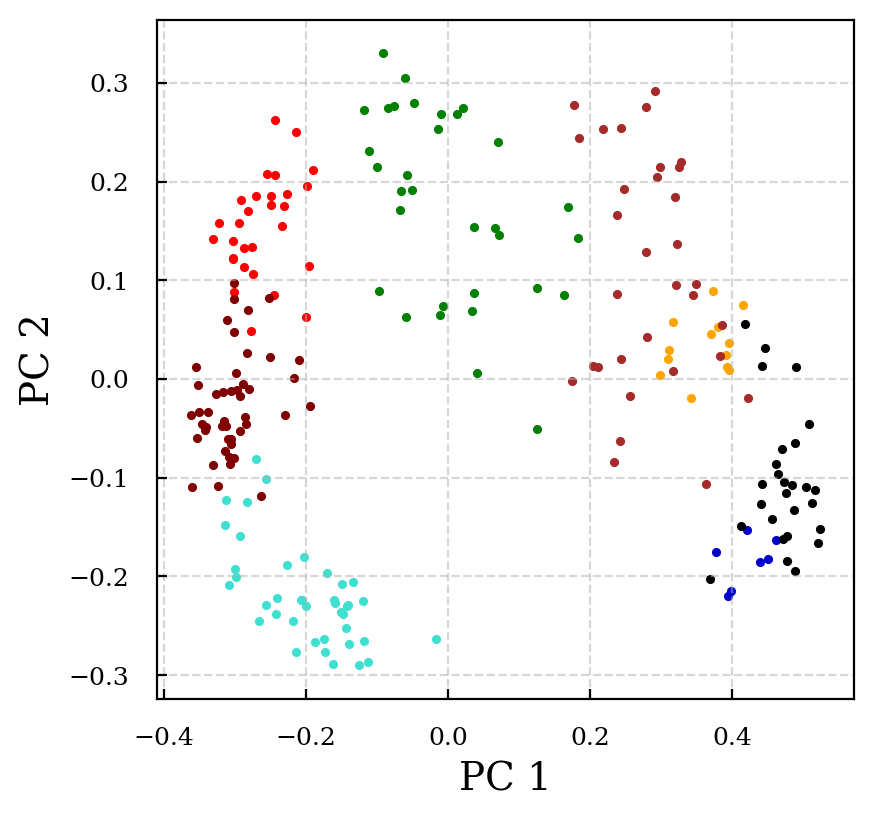

In [172]:
dim_1 = transf[:,0]
dim_2 = transf[:,1]
sns.reset_orig()
plot_pretty()
plt.figure(figsize=(4.5, 4.5))

plt.scatter(dim_1[clust==0],dim_2[clust==0], color='mediumblue',s=5.2)
plt.scatter(dim_1[clust==1],dim_2[clust==1], color='red',s=5.2)
plt.scatter(dim_1[clust==2],dim_2[clust==2], color='green',s=5.2)
plt.scatter(dim_1[clust==3],dim_2[clust==3], color='orange',s=5.2)
plt.scatter(dim_1[clust==4],dim_2[clust==4], color='k',s=5.2)
plt.scatter(dim_1[clust==5],dim_2[clust==5], color='maroon',s=5.2)
plt.scatter(dim_1[clust==6],dim_2[clust==6], color='turquoise',s=5.2)
plt.scatter(dim_1[clust==7],dim_2[clust==7], color='brown',s=5.2)

plt.grid(ls='--',alpha=0.5)
plt.xlabel('PC 1', fontsize=14);plt.ylabel('PC 2', fontsize=14)
plt.show()

## Part III: LDA and word2vec

### a) Topic Modeling with Latent Dirichlet Allocation (LDA)

We will perform topic modeling on the SOU addresses. Let's use 8 topics at first.


Start by creating a bag-of-words matrix.

In [184]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words='english',
                       max_df=0.1,
                       max_features=5000)
BOW_mat = count.fit_transform(corpus)

Now fir a LDA estimator to the bag-of-words matrix and infer 8 different topics from the documents.

In [204]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

LDA_model = LDA(n_components=8,
               random_state=123,
               learning_method='batch')
X_topics = LDA_model.fit_transform(BOW_mat)

In [205]:
LDA_model.components_.shape

(8, 5000)

In [206]:
n_top_words = 10
feature_names = count.get_feature_names()
for topic_idx, topic in enumerate(LDA_model.components_):
    print("Topic %d:"% (topic_idx +1))
    print(" ".join([feature_names[i]
                   for i in topic.argsort()\
                       [:-n_top_words -1:-1]]))

Topic 1:
domingo negro standpoint catholic folly emancipation latitude surveyed mob inheritance
Topic 2:
terrorist iraq vietnam iraqi afghanistan atomic al qaida kid wo
Topic 3:
granada colombian mormon strip riot autocracy interoceanic parity ounce martial
Topic 4:
reconversion wartime atomic cable lease bargaining puerto santiago manila rehabilitation
Topic 5:
annexation honduras paredes ad commencing valorem coffee overture fugitive nueces
Topic 6:
regulatory refugee afghanistan iran weâ marketing tile thatâ solar mobilization
Topic 7:
wrongdoing injunction filipino fashion tree ministry legislator hitler standpoint consols
Topic 8:
pound wool allotment toll workman filipino parcel hon coined manila


##### - Visualize the topics.

### Word2Vec Analysis

First, preprocessing

In [32]:
#def preprocessing_gs(text):
#   # First tokenize in words
#    text = word_tokenize(text)
    # Next convert to lower case
#    text = np.char.lower(text)
#    # ==============================================
    # ==============================================
    # Remove symbols now
#    symbols = "!\"#$%&()*+-/:;,<=>?@[\]^_`{|}~\n1234567890"
#    for i in symbols:
#        text = np.char.replace(text, i, ' ')
    # ==============================================
    #===============================================
    # Now remove the stopwords
#    text = [w for w in text if w not in stopWords]
    # ==============================================
    # ==============================================
    # Remove apostrophes, if any
#    text = np.char.replace(text, "''", " ")
    # ==============================================
    # ==============================================
    # Remove empty entries
#    empty = " "
#    text = [i for i in text if i not in empty ] 
    # ==============================================
    # ==============================================
    # Now lemmatize the  text
#   lemmatizer = WordNetLemmatizer()
    
#   text = [lemmatizer.lemmatize(w) for w in text]
    
#   final_text = ' '.join(text)
#   return final_text

In [33]:
#from gensim.summarization.textcleaner import split_sentences
#sent = split_sentences(preprocessing_gs(df.at[1, "text"]))

#sents = []

#for i in range(len(sent)):
#    sents.append(word_tokenize(sent[i]))
    
#print(sents)

In [34]:
#import gensim.models
#model = gensim.models.Word2Vec(sentences=sents, size=100, window=5, min_count=1, workers=4)

In [35]:
#model.wv.most_similar('fellow')